# 🌲 Algerian Forest Fire Prediction 🔥

This project explores meteorological data from the Algerian Forest dataset to **predict forest fire occurrence** and understand the key contributing factors. It is a **learning project** and not intended for production deployment.

## 📌 Project Objectives
- Perform **Exploratory Data Analysis (EDA)** to uncover patterns and relationships in the data.
- Clean and preprocess data for machine learning.
- Build and evaluate **classification/regression models** to predict fire risk.
- Visualize model results and feature importances.

## 🔍 Dataset
The dataset includes features such as:
- Temperature, RH (Relative Humidity), Wind, Rainfall
- FFMC, DMC, DC, ISI (Canadian Forest Fire Weather Index components)
- Date features (day, month, year)


## 📊 EDA Notebook
View the detailed exploratory analysis here:  
[📘 EDA Notebook (Demo Link)](demo link)

## 🛠️ Tech Stack
- Python, Pandas, Matplotlib, Seaborn
- Scikit-learn
- Jupyter Notebook

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv("Algerian_forest_fires_CLEANED_dataset.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [ ]:
# FWI is our O/P
# Temperature	RH	Ws	Rain	FFMC	DMC	DC	ISI	BUI	Classes are our I/P
df.drop(['day','month','year'],axis=1,inplace=True)

In [ ]:
df.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0


In [ ]:
df["Classes"].value_counts()

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [ ]:
# So encoding required
df["Classes"]=np.where(df["Classes"].str.contains("not fire"),0,1)        # as we have no fire with different spaces

In [ ]:
df["Classes"].value_counts()

,count
Classes,
1,137
0,106


In [ ]:
df.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0


In [ ]:
# Independent And Dependent Features
X = df.drop("FWI", axis = 1)
y=df["FWI"]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.25, random_state = 42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(182, 11)
(61, 11)
(182,)
(61,)


In [ ]:
# feature Selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

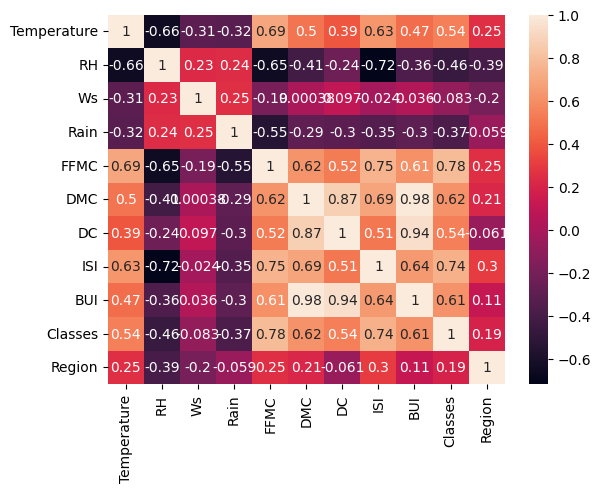

In [ ]:
sns.heatmap(X_train.corr(), annot=True)

In [ ]:
# The function takes the dataset & threshold value suppose 0.95, it will return columns who are co rrelated upto that threshold
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
# threshold, normally set the domain experts
corr_features = correlation(X_train, 0.85)
corr_features

{'BUI', 'DC'}

In [ ]:
## drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

## Standardization

In [ ]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
X_train_scaled.shape, X_test_scaled.shape

((182, 9), (61, 9))

## Checking how outliers are managed by Scaling / Standardizing , Using Boxplots

Text(0.5, 1.0, 'X_train After Scaling')

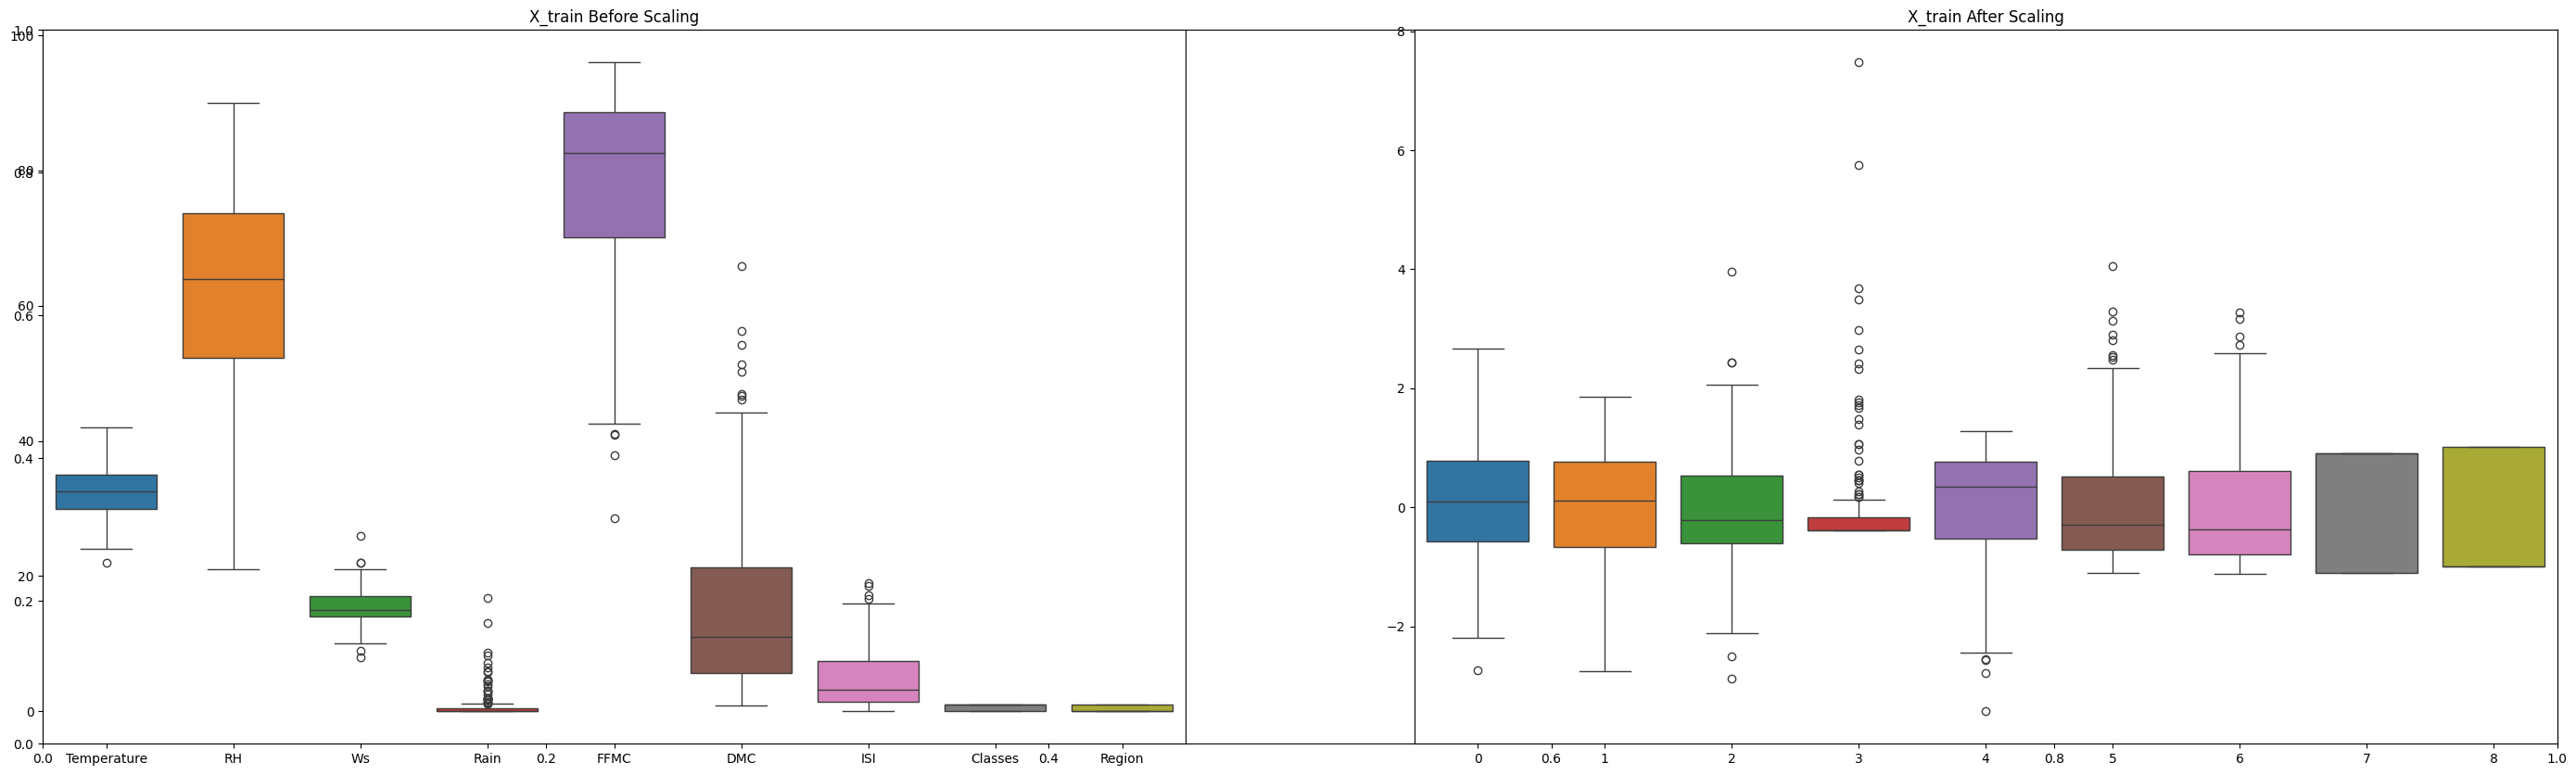

In [ ]:
plt.subplots(figsize=(35, 10))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

## Model Training

### Linear regressiom

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

Mean Absolute Error -  0.5468236465249986
R2 score -  0.9847657384266951


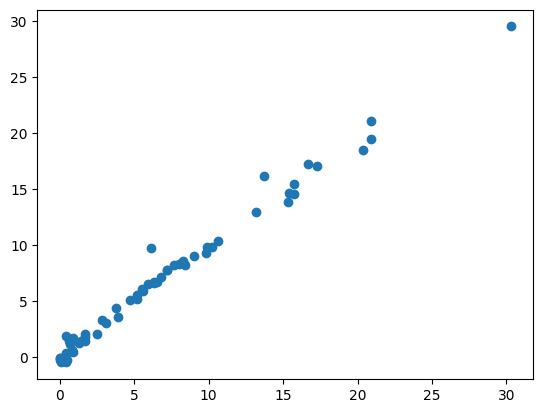

In [ ]:

linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error - ",mae)
print("R2 score - ",score)
plt.scatter(y_test,y_pred)

### Lasso Regression

Mean Absolute Error -  1.133175994914409
R2 score -  0.9492020263112388


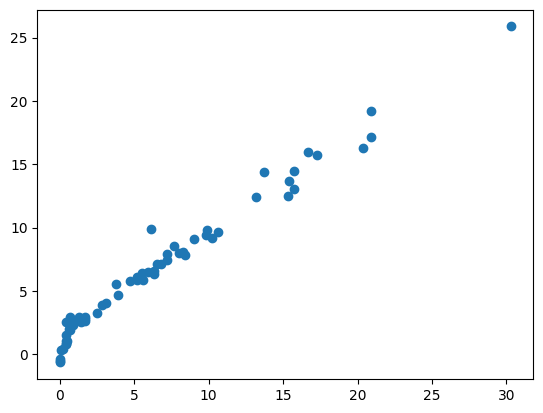

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error - ",mae)
print("R2 score - ",score)
plt.scatter(y_test,y_pred)

## Cross Validation Lasso

In [ ]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [ ]:
lassocv.alpha_

np.float64(0.05725391318234408)

In [ ]:
lassocv.alphas_ # alpha values (100) that were tried, we can check mse_paths and other parameters

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

Mean Absolute Error -  0.619970115826343
R2 score -  0.9820946715928275


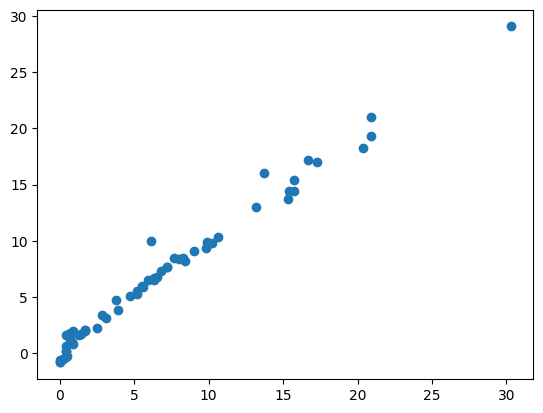

In [ ]:
y_pred=lassocv.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error - ",mae)
print("R2 score - ",score)
plt.scatter(y_test,y_pred)

### Ridge Regression

Mean Absolute Error -  0.5642305340105692
R2 score -  0.9842993364555513


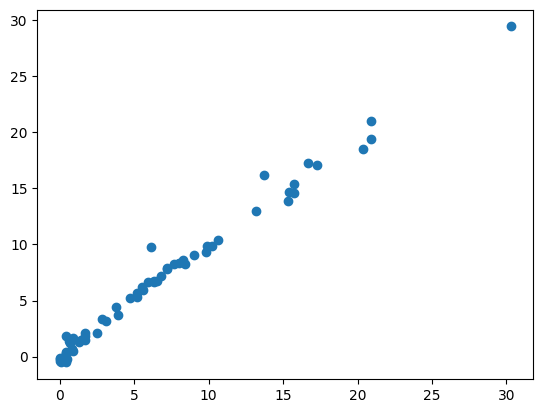

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error - ",mae)
print("R2 score - ",score)
plt.scatter(y_test,y_pred)

### Cross validation - Ridge Regression

Mean absolute error 0.5642305340105692
R2 Score 0.9842993364555513


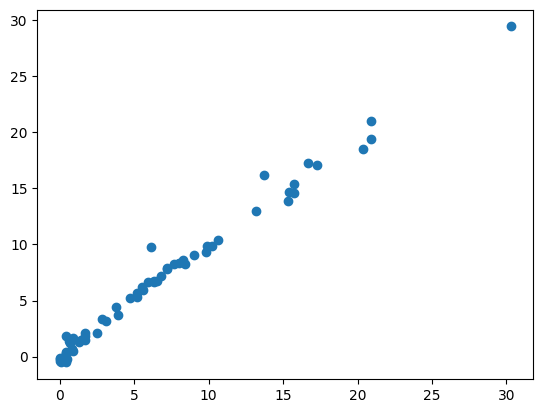

In [ ]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [ ]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

### ElasticNet Regresion

Mean absolute error 1.8822353634896005
R2 Score 0.8753460589519703


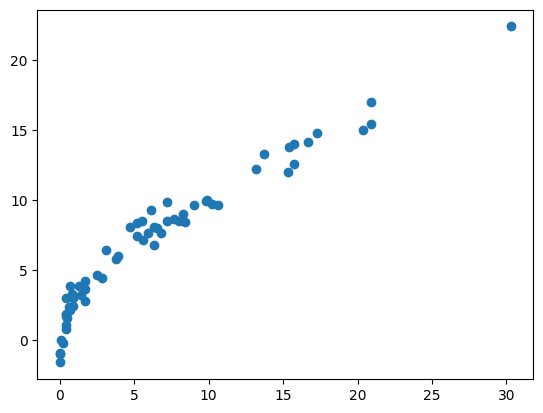

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

### ElasticNet Cross Validation


Mean absolute error 0.6575946731430898
R2 Score 0.9814217587854941


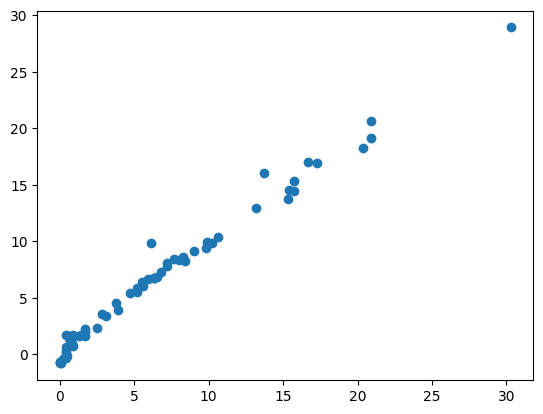

In [ ]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [ ]:
y_pred

array([ 8.26896303,  7.80499035, -0.10373519,  4.5910001 ,  6.88725274,
        1.59410811,  2.35512483,  8.0623476 ,  1.72415002,  3.53713054,
        0.6324586 ,  9.86752845,  9.43037004, 16.93741658, 18.24537235,
        1.65750426,  1.70187606, -0.64660717,  7.25494999,  3.39769372,
        1.6585457 ,  0.11316128,  6.66222016,  0.2768868 , 20.66780763,
        5.47501303,  6.05587139,  9.84868106, -0.65326652,  9.93266416,
        6.72851251, -0.29425171, 10.39747097, 14.48835483,  1.70083377,
        0.73634118,  2.25453683,  6.37570352, -0.71507088, -0.36129277,
        6.8083341 ,  1.96274355,  8.60448104, -0.79781122, 15.32067065,
        8.39541208,  8.43742252,  1.41818555, 13.00237268,  1.28988758,
       28.93275959,  5.88819725, 17.04972357, 19.1125176 , 13.71477759,
       16.09820311,  0.99493652,  9.16486312,  3.91448039, 14.57731138,
        5.50092909])

## Model Pickling for ML models, pre-processing model StandardScaler

In [ ]:
import pickle
pickle.dump(scaler, open("scaler.pkl", "wb"))
loaded_scaler = pickle.load(open("scaler.pkl", "rb"))
pickle.dump(elasticcv, open("elasticcv_model.pkl", "wb"))
loaded_model = pickle.load(open("elasticcv_model.pkl", "rb"))
X_test_scaled = loaded_scaler.transform(X_test)
inference = loaded_model.predict(X_test_scaled)
inference

array([ 8.26896303,  7.80499035, -0.10373519,  4.5910001 ,  6.88725274,
        1.59410811,  2.35512483,  8.0623476 ,  1.72415002,  3.53713054,
        0.6324586 ,  9.86752845,  9.43037004, 16.93741658, 18.24537235,
        1.65750426,  1.70187606, -0.64660717,  7.25494999,  3.39769372,
        1.6585457 ,  0.11316128,  6.66222016,  0.2768868 , 20.66780763,
        5.47501303,  6.05587139,  9.84868106, -0.65326652,  9.93266416,
        6.72851251, -0.29425171, 10.39747097, 14.48835483,  1.70083377,
        0.73634118,  2.25453683,  6.37570352, -0.71507088, -0.36129277,
        6.8083341 ,  1.96274355,  8.60448104, -0.79781122, 15.32067065,
        8.39541208,  8.43742252,  1.41818555, 13.00237268,  1.28988758,
       28.93275959,  5.88819725, 17.04972357, 19.1125176 , 13.71477759,
       16.09820311,  0.99493652,  9.16486312,  3.91448039, 14.57731138,
        5.50092909])

# Are y_pred and inference same ?

In [ ]:
if y_pred.all() == inference.all():
  print("Pickling Successful.")

Pickling Successful.
